In [43]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [44]:
# Read csv
file = 'Resources/myopia.csv'
df = pd.read_csv(file)
df.head(2)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0


In [45]:
df.columns

# Define MYOPIC values as labels for coloring in plot later
labels = df['MYOPIC']

In [46]:
# Drop 'MYOPIC' column
df.drop(columns= ['MYOPIC'], inplace= True)

In [47]:
# Scale data
df_scaled = StandardScaler().fit_transform(df)
df_scaled[0:2]

array([[-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
        -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
         0.18405806,  0.49830393,  0.98713773,  1.0032415 ],
       [-0.42021911, -0.30861224, -0.1718398 ,  0.53591028, -0.96799728,
        -0.13076253, -0.99889822, -0.91206246, -0.36187479, -0.22140908,
        -0.34093217, -0.87508755,  0.98713773,  1.0032415 ]])

In [48]:
# Apply the Dimensionality Reduction with PCA
pca = PCA(n_components= .90)

# Fit scaled data and compare
df_pca = pca.fit_transform(df_scaled)
df_pca[0]

array([ 0.53550271,  1.14500427, -1.38501894,  0.11600593, -3.22669052,
       -1.92845879, -1.95889156, -1.92299652,  0.02675285,  0.17814386])

In [49]:
# Transform PCA data to a DF -- 10 columns
df_myopia_pca = pd.DataFrame(
    data= df_pca,
    columns=['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9', 'PC_10']
)

df_myopia_pca.head(2)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031


In [50]:
# Explain the variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

### PCA Explained Variance

After reducing the data using dimensionality reduction with PCA, it resulted from 14 principal components to 10 principal comonenents using 90% of the information in the dataset. 

In [51]:
# Initialize t_SNE model
tsne = TSNE(learning_rate= 35, perplexity= 50)

# Reduce dataset dimensions with t_SNE and inspect result
tsne_features = tsne.fit_transform(df_myopia_pca)

# Shape tsne dataset
tsne_features.shape

C:\Users\Xyn\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(618, 2)

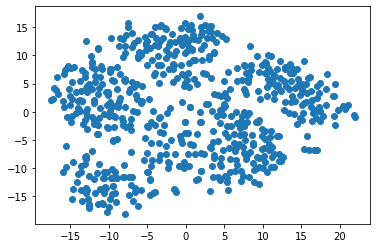

In [52]:
# Plot scatter plot
df_myopia_pca['x'] = tsne_features[:,0]
df_myopia_pca['y']= tsne_features[:,1]

plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'])
plt.show()

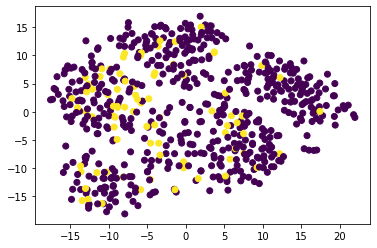

In [53]:
# Plot scatter plot
df_myopia_pca['x'] = tsne_features[:,0]
df_myopia_pca['y']= tsne_features[:,1]

plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c= labels)
plt.show()

In [54]:
# Use value_counts() to tell how many clusters are there
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

### Are there distinct clusters?
In the scatter plot without the 'MYOPIA' labels, the clusters are fairly distinctable. There are possibly 7 clusters in the plot. 

In the second scatter plot with the 'MYOPIA' labels, the clusters are more noticable. There are possibly 2 clusters with one group plotted above 0 on y-axis and the other group plotted below 0 on y-axis. 

In [55]:
# Create elbow ploit to identify best number of clusters

# Array to hold inertia values
inertia = []

# k-values == number of clusters to test
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Use a loop to calculate the inertia values based on the k values (number of clusters)
for value in k: 
    
    # Set up kmeans model
    model = KMeans(n_clusters= value, random_state= 42)
    
    # Fit the model into DF
    model.fit(df_myopia_pca)
    
    # Calulate and extract the inertia_property, then store into array
    inertia.append(model.inertia_)
    
# Create a df for elbow curve
elbowData = {
    'k' : k, 
    'inertia' : inertia
}

df_elbow = pd.DataFrame(elbowData)
df_elbow.head()
    

,k,inertia
0,1,110624.622892
1,2,66045.899794
2,3,40804.775852
3,4,31288.735199
4,5,22485.667887


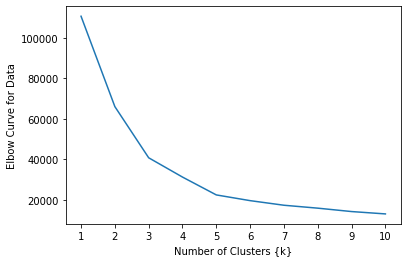

In [56]:
# Plot the elbow curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters {k}')
plt.ylabel('Elbow Curve for Data')
plt.show()

## Predict Best value of k (clusters)

In [57]:
# Function to predict k value

def get_clusters(k, data):
    
    # Set up kMeans model
    model = KMeans(n_clusters = k, random_state= 42)
    
    # Fit the model using data
    model.fit(data)
    
    # Calculate the predictions
    predictions = model.predict(data)
    
    # Use the labels_ property to label the data
    data['classification'] = model.labels_
    
    # Return the dataframe generated
    return data

## K = 3

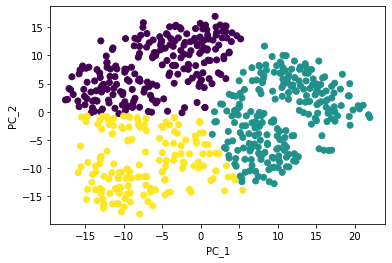

In [58]:
# Plot using k= 3
get_clusters(3, df_myopia_pca)

# Show df
df_myopia_pca.head(2)

# Analyze clusters with the first best value of k
def show_clusters(df):
    plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c= df['classification'])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    plt.show()
    
show_clusters(df_myopia_pca)

## K = 5

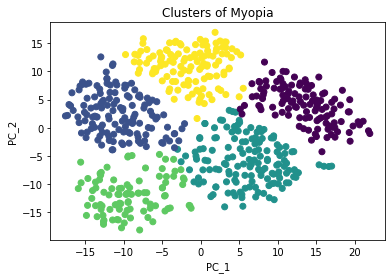

In [59]:
# Plot using k= 5
get_clusters(5, df_myopia_pca)

# Show df
df_myopia_pca.head(2)

# Analyze clusters with the first best value of k
def show_clusters(df):
    plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c= df['classification'])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    plt.title('Clusters of Myopia')
    plt.show()
    
show_clusters(df_myopia_pca)

## K = 6

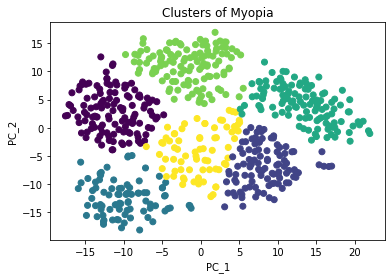

In [60]:
# Plot using k= 6
get_clusters(6, df_myopia_pca)

# Show df
df_myopia_pca.head(2)

# Analyze clusters with the first best value of k
def show_clusters(df):
    plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c= df['classification'])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    plt.title('Clusters of Myopia')
    plt.show()
    
show_clusters(df_myopia_pca)

## K = 7

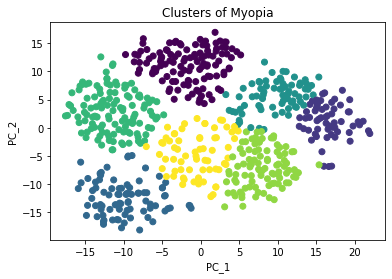

In [61]:
# Plot using k= 7
get_clusters(7, df_myopia_pca)

# Show df
df_myopia_pca.head(2)

# Analyze clusters with the first best value of k
def show_clusters(df):
    plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'], c= df['classification'])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    plt.title('Clusters of Myopia')
    plt.show()
    
show_clusters(df_myopia_pca)

## Make a Recommendation

Using the Elbow Curve plot to predict the best value of k, the point where the inertia starts to slow down is at k value equal to 5. 
With this information, I plotted a few scatter plots to visualize clusters at different k values . I recommend the optimal number of clusters to be either 5 or 6 groups. 